In [1]:
import pandas as pd
import seaborn as sbs
import numpy as np
import calendar
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv('tp_bike/train.csv')
test = pd.read_csv('tp_bike/test.csv')

In [19]:
trip = pd.read_csv('tp_bike/trip.csv')

In [3]:
print len(train)
print len(test)

549961
119998


In [6]:
cols = ['id', 'start_station_id', 'bike_id', 'subscription_type', 'month_start', 'weekday', 'hour_start']
features = train[cols]
duration = train.duration

In [7]:
#voy a variar el parametro de random_state desde 0 a 50
n_list = range(0,51)

squared_error = []

reg = linear_model.LinearRegression()

for n in n_list:

    x_train, x_test, y_train, y_test = train_test_split(features, duration, test_size = 0.6, random_state = n)

    reg.fit(x_train, y_train) 

    pred = reg.predict(x_test)

    score = mean_squared_error(pred,y_test)
    
    squared_error.append(score)

In [8]:
#el vector del error para cada parametro
squared_error

[948149745.27316415,
 940148032.69565344,
 956345151.57496619,
 61501706.093348056,
 58212798.747883484,
 953624110.17427278,
 63375984.94759731,
 963748901.25014257,
 58821309.049064584,
 935732477.46642375,
 957423258.5582552,
 958186721.74937987,
 953283352.77747309,
 936756023.2445811,
 937857284.40217495,
 49403020.674316965,
 946437558.65137494,
 950740689.45513499,
 956083881.45150173,
 60807362.903518274,
 968030527.61483979,
 963210826.5241729,
 31070217.918043423,
 60006477.628938191,
 969374927.91008365,
 943273421.72105289,
 949412297.12021327,
 47690462.57646744,
 964798948.8372364,
 939987486.51432085,
 950235402.01355267,
 948947193.13982928,
 60405039.532692,
 949875635.32918048,
 63133549.330004975,
 965634518.57119358,
 951280490.74639404,
 33432006.715999123,
 958370649.52815437,
 965247567.00643194,
 964922597.99109614,
 45480056.782496989,
 962908937.09485054,
 47907101.911740437,
 963753154.23094285,
 32045542.441266354,
 50449884.907010101,
 46235009.041153058,
 

In [10]:
#le plego su n, corresponiente
square_with_n = zip(squared_error,n_list)

In [12]:
type(square_with_n)

list

In [14]:
#ordeno
square_with_n.sort(key = lambda x: x[0])

In [15]:
#curiosamente el que peor resultado me dio en el train(n = 24), fue el que
#mejor anduvo en la prediccion
square_with_n

[(31070217.918043423, 22),
 (32045542.441266354, 45),
 (33432006.715999123, 37),
 (45480056.782496989, 41),
 (46235009.041153058, 47),
 (47690462.57646744, 27),
 (47907101.911740437, 43),
 (49403020.674316965, 15),
 (50449884.907010101, 46),
 (56967666.159565203, 50),
 (58212798.747883484, 4),
 (58821309.049064584, 8),
 (60006477.628938191, 23),
 (60405039.532692, 32),
 (60807362.903518274, 19),
 (61501706.093348056, 3),
 (63133549.330004975, 34),
 (63375984.94759731, 6),
 (935732477.46642375, 9),
 (936756023.2445811, 13),
 (937857284.40217495, 14),
 (939987486.51432085, 29),
 (940148032.69565344, 1),
 (942402662.51400781, 49),
 (943273421.72105289, 25),
 (946437558.65137494, 16),
 (948149745.27316415, 0),
 (948947193.13982928, 31),
 (949412297.12021327, 26),
 (949875635.32918048, 33),
 (950235402.01355267, 30),
 (950740689.45513499, 17),
 (951280490.74639404, 36),
 (953283352.77747309, 12),
 (953624110.17427278, 5),
 (956083881.45150173, 18),
 (956345151.57496619, 2),
 (957423258.5582

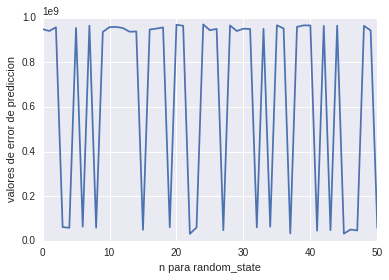

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(n_list, squared_error);
plt.xlabel('n para random_state ');
plt.ylabel('valores de error de prediccion');

In [41]:
#pruebo distintos parametros con el test

reg1 = linear_model.LinearRegression()

x_train, x_test, y_train, y_test = train_test_split(features, duration, test_size = 0.6, random_state = 24)

reg1.fit(x_train, y_train) 

pred = reg1.predict(x_test)

score = mean_squared_error(pred,y_test)

score

969374927.91008365

In [42]:
test2 = test[cols]

In [43]:
#uso el test

prediccion2 = reg1.predict(test2)

In [44]:
tripIdDuration = trip[['id','duration']]
target = test[['id']]
testTarget = pd.merge(tripIdDuration,target, how = "inner", on = "id")


In [45]:
duration_real = testTarget['duration']

In [46]:
score_test2 = mean_squared_error(prediccion2,duration_real)
score_test2


44142823.316898465

In [47]:
#random_state
#con n = 22
#pase de 44298018.733980671(n=0)
#a esto 44924078.129377045(n=22)

#con n = 45
#pase de 44298018.733980671(n=0)
#a esto 44859764.835100546(n=45)

#con n = 37
#pase de 44298018.733980671(n=0)
#a esto 44741925.566305071(n=37)

#con n = 24
#pase de 44298018.733980671(n=0)
#a esto 44142823.316898465(n=24)

In [48]:
ids = test.id
data = {'id': ids, 'duration': prediccion2}
submit2 = pd.DataFrame(data)

In [49]:
submit2.head(3)

,duration,id
0,3854.028536,504737
1,626.660894,530846
2,503.987144,813140


In [51]:
len(submit2)

119998

In [52]:
#submit2.to_csv('Submit2.csv',index=False)